In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load preprocessed data from EDA script
df = pd.read_csv('./train_processed.csv',index_col=0)
df_encode = pd.read_csv('./train_processed_encoded.csv',index_col=0)

In [3]:
df_encode.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,5.0,20.0,0.0,0.0,...,1.0,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,5.0,23.0,1.0,1.0,...,0.0,5.522560,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,23.0,22.0,0.0,0.0,...,1.0,7.477132,2.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,3.0,20.0,1.0,1.0,...,1.0,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
4,11.0,1.0,0.0,1.0,1.0,4.720703,14.0,20.0,0.0,1.0,...,0.0,4.098210,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [4]:
# Check columns
df_encode.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Follow-up', 'Gender',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [5]:
# View genetic disorders
print(df['Genetic Disorder'].value_counts())
print(df['Disorder Subclass'].value_counts())

disorders = df['Genetic Disorder'].unique()
disorderSub = df['Disorder Subclass'].unique()

print(len(disorders), disorders)
print(len(disorderSub), disorderSub)

Mitochondrial genetic inheritance disorders     12348
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic Disorder, dtype: int64
Leigh syndrome                         7328
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64
3 ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
9 ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


In [6]:
# View disorder / disorder subclass relationship
disorderSubclasses = df.groupby(['Genetic Disorder','Disorder Subclass']).size()
disorderSubclasses

Genetic Disorder                              Disorder Subclass                  
Mitochondrial genetic inheritance disorders   Alzheimer's                              19
                                              Cancer                                    6
                                              Cystic fibrosis                         303
                                              Diabetes                                164
                                              Hemochromatosis                         127
                                              Leber's hereditary optic neuropathy     648
                                              Leigh syndrome                         6399
                                              Mitochondrial myopathy                 4405
                                              Tay-Sachs                               277
Multifactorial genetic inheritance disorders  Alzheimer's                             133
                  

In [7]:
sorted(np.array(disorderSubclasses))

[6,
 19,
 91,
 127,
 133,
 164,
 194,
 277,
 303,
 648,
 735,
 1228,
 1653,
 2556,
 3145,
 4405,
 6399]

In [18]:
disorderSubclasses.loc[disorderSubclasses < 250]

Genetic Disorder                              Disorder Subclass
Mitochondrial genetic inheritance disorders   Alzheimer's           19
                                              Cancer                 6
                                              Diabetes             164
                                              Hemochromatosis      127
Multifactorial genetic inheritance disorders  Alzheimer's          133
                                              Cancer                91
                                              Leigh syndrome       194
dtype: object

In [19]:
minor_classes = [
    'Mitochondrial genetic inheritance disorders - Alzheimer\'s',
    'Mitochondrial genetic inheritance disorders - Cancer',
    'Mitochondrial genetic inheritance disorders - Diabetes',
    'Mitochondrial genetic inheritance disorders - Hemochromatosis',
    'Multifactorial genetic inheritance disorders - Alzheimer\'s',
    'Multifactorial genetic inheritance disorders - Cancer',
    'Multifactorial genetic inheritance disorders - Leigh syndrome',
]

In [29]:
disorderSubclasses.loc[disorderSubclasses > 250]

Genetic Disorder                              Disorder Subclass                  
Mitochondrial genetic inheritance disorders   Cystic fibrosis                         303
                                              Leber's hereditary optic neuropathy     648
                                              Leigh syndrome                         6399
                                              Mitochondrial myopathy                 4405
                                              Tay-Sachs                               277
Multifactorial genetic inheritance disorders  Diabetes                               1653
Single-gene inheritance diseases              Cystic fibrosis                        3145
                                              Hemochromatosis                        1228
                                              Leigh syndrome                          735
                                              Tay-Sachs                              2556
dtype: int64

In [14]:
df_encode['Genetic Disorder'] = df['Genetic Disorder']
df_encode['Disorder Subclass'] = df['Disorder Subclass']
df_encode['Combined'] = df_encode['Genetic Disorder'].astype(str) + ' - ' + df_encode['Disorder Subclass']

In [15]:
df_encode

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,Combined
0,2.0,1.0,0.0,1.0,0.0,4.760603,5.0,20.0,0.0,0.0,...,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - ...
1,4.0,1.0,1.0,0.0,0.0,4.910669,5.0,23.0,1.0,1.0,...,5.522560,2.0,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis,Mitochondrial genetic inheritance disorders - ...
2,6.0,1.0,0.0,0.0,0.0,4.893297,23.0,22.0,0.0,0.0,...,7.477132,2.0,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes,Multifactorial genetic inheritance disorders -...
3,12.0,1.0,0.0,1.0,0.0,4.705280,3.0,20.0,1.0,1.0,...,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...
4,11.0,1.0,0.0,1.0,1.0,4.720703,14.0,20.0,0.0,1.0,...,4.098210,3.0,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer,Multifactorial genetic inheritance disorders -...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,1.0,1.0,1.0,0.0,5.258298,17.0,64.0,1.0,0.0,...,6.584811,1.0,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...
22079,8.0,0.0,1.0,0.0,1.0,4.974220,5.0,56.0,0.0,0.0,...,7.041556,1.0,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes,Multifactorial genetic inheritance disorders -...
22080,8.0,1.0,0.0,1.0,0.0,5.186470,17.0,51.0,1.0,1.0,...,7.715465,2.0,0.0,0.0,0.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy,Mitochondrial genetic inheritance disorders - ...
22081,7.0,1.0,0.0,1.0,1.0,4.858542,1.0,20.0,0.0,1.0,...,8.437671,0.0,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...


In [52]:
df_encode_bal = df_encode.loc[~df_encode['Combined'].isin(minor_classes)].reset_index(drop=True)
df_encode_bal

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,Combined
0,2.0,1.0,0.0,1.0,0.0,4.760603,5.0,20.0,0.0,0.0,...,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - ...
1,4.0,1.0,1.0,0.0,0.0,4.910669,5.0,23.0,1.0,1.0,...,5.522560,2.0,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis,Mitochondrial genetic inheritance disorders - ...
2,6.0,1.0,0.0,0.0,0.0,4.893297,23.0,22.0,0.0,0.0,...,7.477132,2.0,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes,Multifactorial genetic inheritance disorders -...
3,12.0,1.0,0.0,1.0,0.0,4.705280,3.0,20.0,1.0,1.0,...,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...
4,14.0,1.0,0.0,1.0,0.0,5.103188,5.0,20.0,1.0,0.0,...,10.272230,2.0,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis,Single-gene inheritance diseases - Cystic fibr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21344,4.0,1.0,1.0,1.0,0.0,5.258298,17.0,64.0,1.0,0.0,...,6.584811,1.0,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...
21345,8.0,0.0,1.0,0.0,1.0,4.974220,5.0,56.0,0.0,0.0,...,7.041556,1.0,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes,Multifactorial genetic inheritance disorders -...
21346,8.0,1.0,0.0,1.0,0.0,5.186470,17.0,51.0,1.0,1.0,...,7.715465,2.0,0.0,0.0,0.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy,Mitochondrial genetic inheritance disorders - ...
21347,7.0,1.0,0.0,1.0,1.0,4.858542,1.0,20.0,0.0,1.0,...,8.437671,0.0,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...


In [53]:
X = df_encode_bal.iloc[:,:-3]
y_gd = df_encode_bal.iloc[:,-3]
y_ds = df_encode_bal.iloc[:,-2]
y_gdds = df_encode_bal.iloc[:,-1]

In [71]:
y_gdds.value_counts()

Mitochondrial genetic inheritance disorders - Leigh syndrome                         6399
Mitochondrial genetic inheritance disorders - Mitochondrial myopathy                 4405
Single-gene inheritance diseases - Cystic fibrosis                                   3145
Single-gene inheritance diseases - Tay-Sachs                                         2556
Multifactorial genetic inheritance disorders - Diabetes                              1653
Single-gene inheritance diseases - Hemochromatosis                                   1228
Single-gene inheritance diseases - Leigh syndrome                                     735
Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy     648
Mitochondrial genetic inheritance disorders - Cystic fibrosis                         303
Mitochondrial genetic inheritance disorders - Tay-Sachs                               277
Name: Combined, dtype: int64

In [30]:
major_classes = {
    'Mitochondrial genetic inheritance disorders - Cystic fibrosis': 1400,
    'Mitochondrial genetic inheritance disorders - Leber\'s hereditary optic neuropathy': 1400,
    'Mitochondrial genetic inheritance disorders - Tay-Sachs': 1400,
    'Single-gene inheritance diseases - Hemochromatosis':1400,
    'Single-gene inheritance diseases - Leigh syndrome':1400,
    }

In [54]:
# Combine over and under sampling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy = major_classes)
under = RandomUnderSampler(sampling_strategy='not minority')


In [55]:
X_resam, y_resam = over.fit_resample(X,y_gdds)
X_resam, y_resam = under.fit_resample(X_resam,y_resam)


In [72]:
y_gd.value_counts()

Mitochondrial genetic inheritance disorders     12032
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     1653
Name: Genetic Disorder, dtype: int64

In [73]:
under_class = {
    'Mitochondrial genetic inheritance disorders' : 7664   
}
over_class = {
    'Multifactorial genetic inheritance disorders' : 7664
}
over = SMOTE(sampling_strategy = over_class)
under = RandomUnderSampler(sampling_strategy='not minority')

In [75]:
X_resam, y_resam = over.fit_resample(X,y_gd)
X_resam, y_resam = under.fit_resample(X_resam,y_resam)

In [76]:
y_resam.value_counts()

Mitochondrial genetic inheritance disorders     7664
Multifactorial genetic inheritance disorders    7664
Single-gene inheritance diseases                7664
Name: Genetic Disorder, dtype: int64

In [79]:
X_resam

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,4.0,1.0,0.0,1.0,0.0,4.837770,8.0,22.0,1.0,0.0,...,1.0,0.0,0.0,7.262871,2.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,0.0,1.0,1.0,5.059237,13.0,43.0,1.0,0.0,...,0.0,0.0,1.0,7.452315,1.0,0.0,1.0,1.0,0.0,0.0
2,5.0,0.0,0.0,0.0,1.0,5.007350,5.0,20.0,1.0,0.0,...,1.0,1.0,0.0,4.210260,0.0,0.0,1.0,1.0,0.0,1.0
3,8.0,0.0,0.0,1.0,0.0,4.931631,5.0,49.0,0.0,0.0,...,0.0,4.0,1.0,6.349077,2.0,1.0,0.0,1.0,0.0,1.0
4,12.0,0.0,1.0,1.0,0.0,5.108317,20.0,20.0,1.0,1.0,...,0.0,0.0,1.0,7.145724,3.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22987,4.0,0.0,1.0,1.0,1.0,4.920090,18.0,54.0,1.0,0.0,...,1.0,4.0,0.0,7.694666,3.0,1.0,1.0,1.0,0.0,0.0
22988,2.0,1.0,0.0,0.0,1.0,5.093864,5.0,20.0,0.0,0.0,...,0.0,2.0,0.0,3.000000,0.0,1.0,0.0,0.0,0.0,0.0
22989,5.0,0.0,0.0,1.0,0.0,4.581118,5.0,20.0,0.0,1.0,...,1.0,3.0,1.0,3.000000,2.0,0.0,1.0,1.0,1.0,1.0
22990,2.0,0.0,1.0,1.0,1.0,4.924825,18.0,20.0,1.0,0.0,...,0.0,4.0,1.0,7.934586,3.0,1.0,0.0,0.0,0.0,0.0


In [46]:
y_resam

0        Mitochondrial genetic inheritance disorders - ...
1        Mitochondrial genetic inheritance disorders - ...
2        Mitochondrial genetic inheritance disorders - ...
3        Mitochondrial genetic inheritance disorders - ...
4        Mitochondrial genetic inheritance disorders - ...
                               ...                        
13995         Single-gene inheritance diseases - Tay-Sachs
13996         Single-gene inheritance diseases - Tay-Sachs
13997         Single-gene inheritance diseases - Tay-Sachs
13998         Single-gene inheritance diseases - Tay-Sachs
13999         Single-gene inheritance diseases - Tay-Sachs
Name: Combined, Length: 14000, dtype: object

In [77]:
X_resam.to_csv('./x_gd_resampled.csv')

In [78]:
y_resam.to_csv('./y_gd_resampled.csv')

<AxesSubplot:ylabel='Combined'>

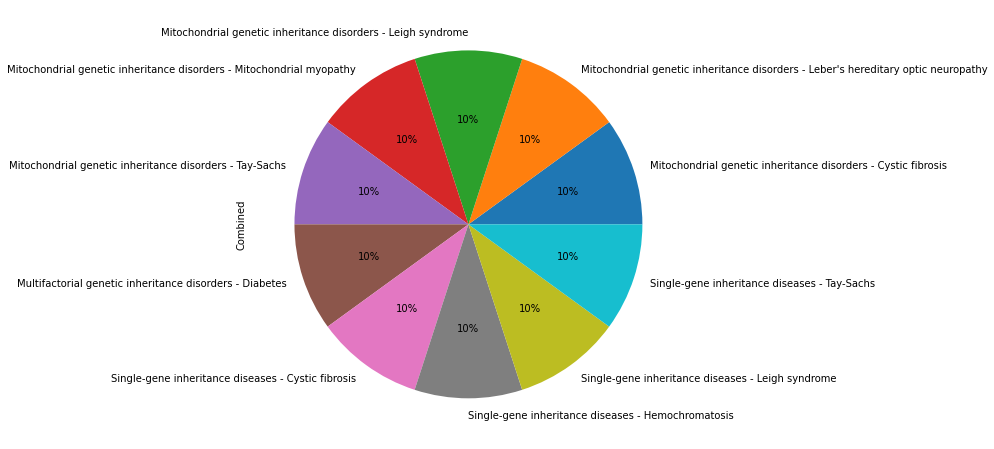

In [61]:
figure = plt.figure(figsize=(20,8))
y_resam.value_counts().plot.pie(autopct='%.0f%%')

<AxesSubplot:ylabel='0'>

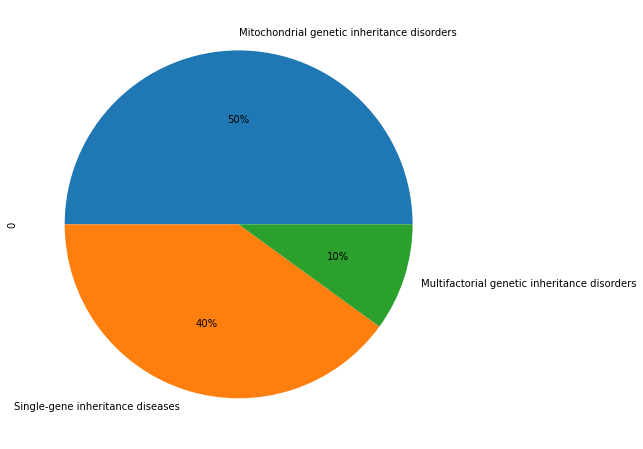

In [69]:
figure = plt.figure(figsize=(20,8))
y_resam.str.split(' - ', expand=True)[0].value_counts().plot.pie(autopct='%.0f%%')

<AxesSubplot:ylabel='1'>

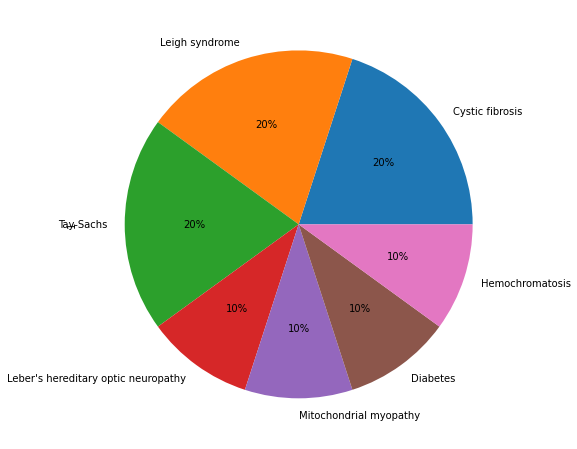

In [70]:
figure = plt.figure(figsize=(20,8))
y_resam.str.split(' - ', expand=True)[1].value_counts().plot.pie(autopct='%.0f%%')

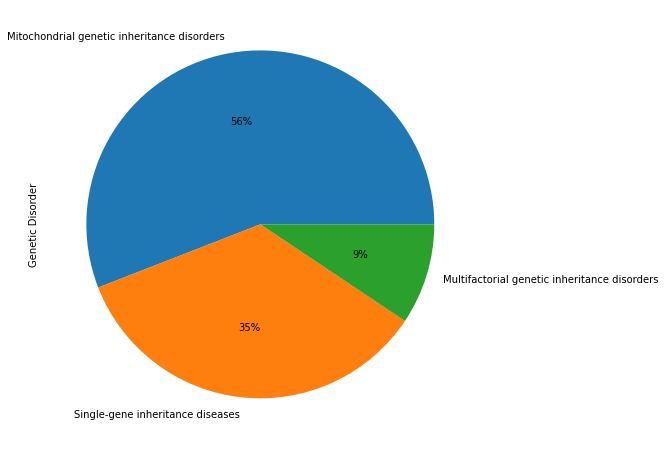

In [8]:
# Plot distribution of genetic disorders
figure = plt.figure(figsize=(20,8))
df['Genetic Disorder'].value_counts().plot.pie(autopct='%.0f%%')
plt.savefig('./figures/DisorderPieChart.png')
plt.show()

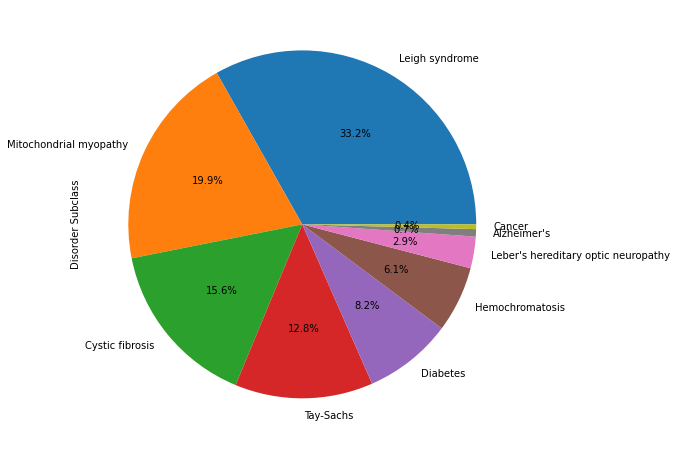

In [9]:
# Plot distribution of genetic disorders subtypes
figure = plt.figure(figsize=(20,8))
df['Disorder Subclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.savefig('./figures/SubclassPieChart.png')
plt.show()

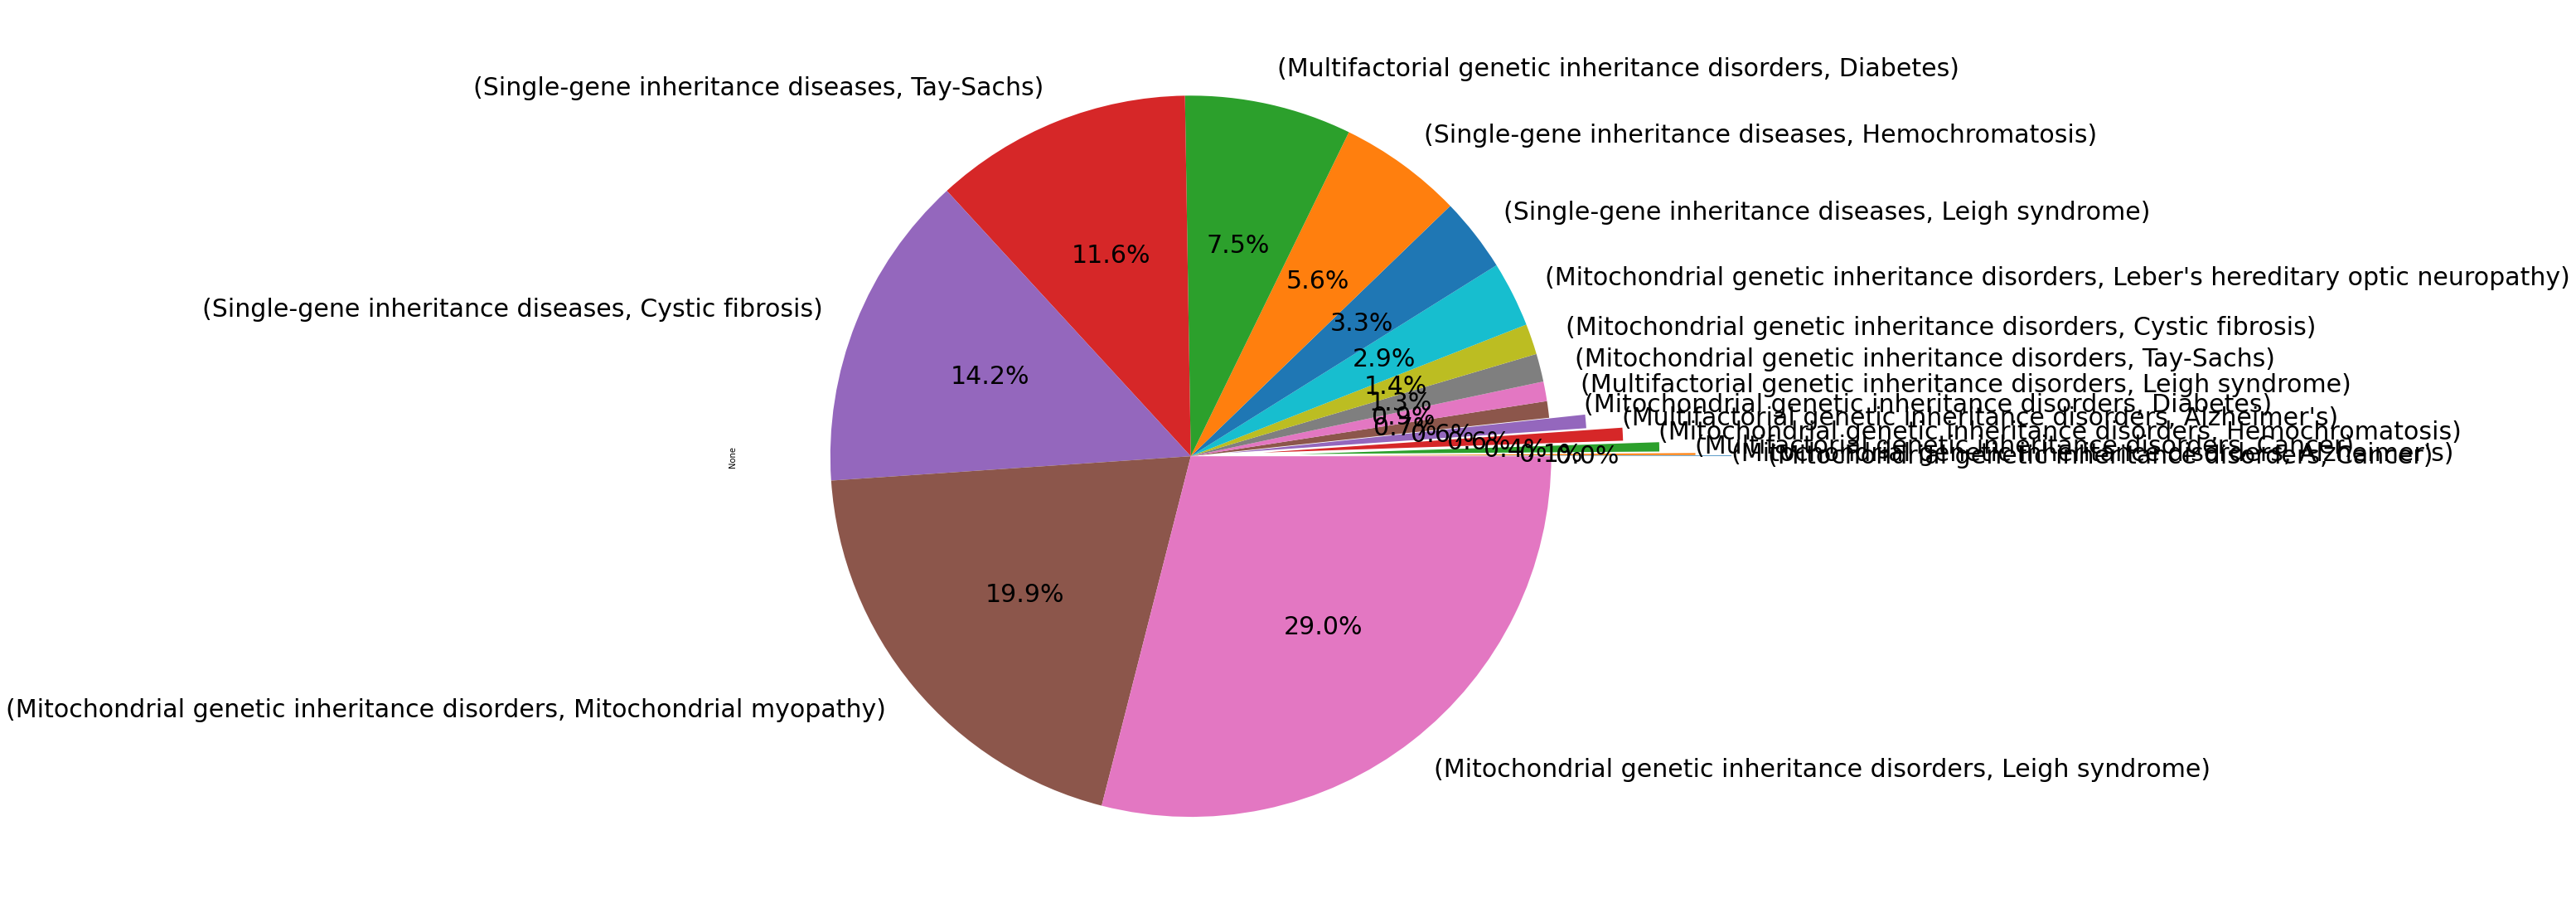

In [31]:
# Plot distribution of genetic disorders + disorder subtype combinations
figure = plt.figure(figsize=(40,20))
disorderSubclasses.sort_values().plot.pie(autopct='%1.1f%%', fontsize=30, explode=(0.5,0.4,0.3,0.2,0.1,0,0,0,0,0,0,0,0,0,0,0,0))
plt.savefig('./figures/Disorder+SubclassPieChart.png')
plt.show()

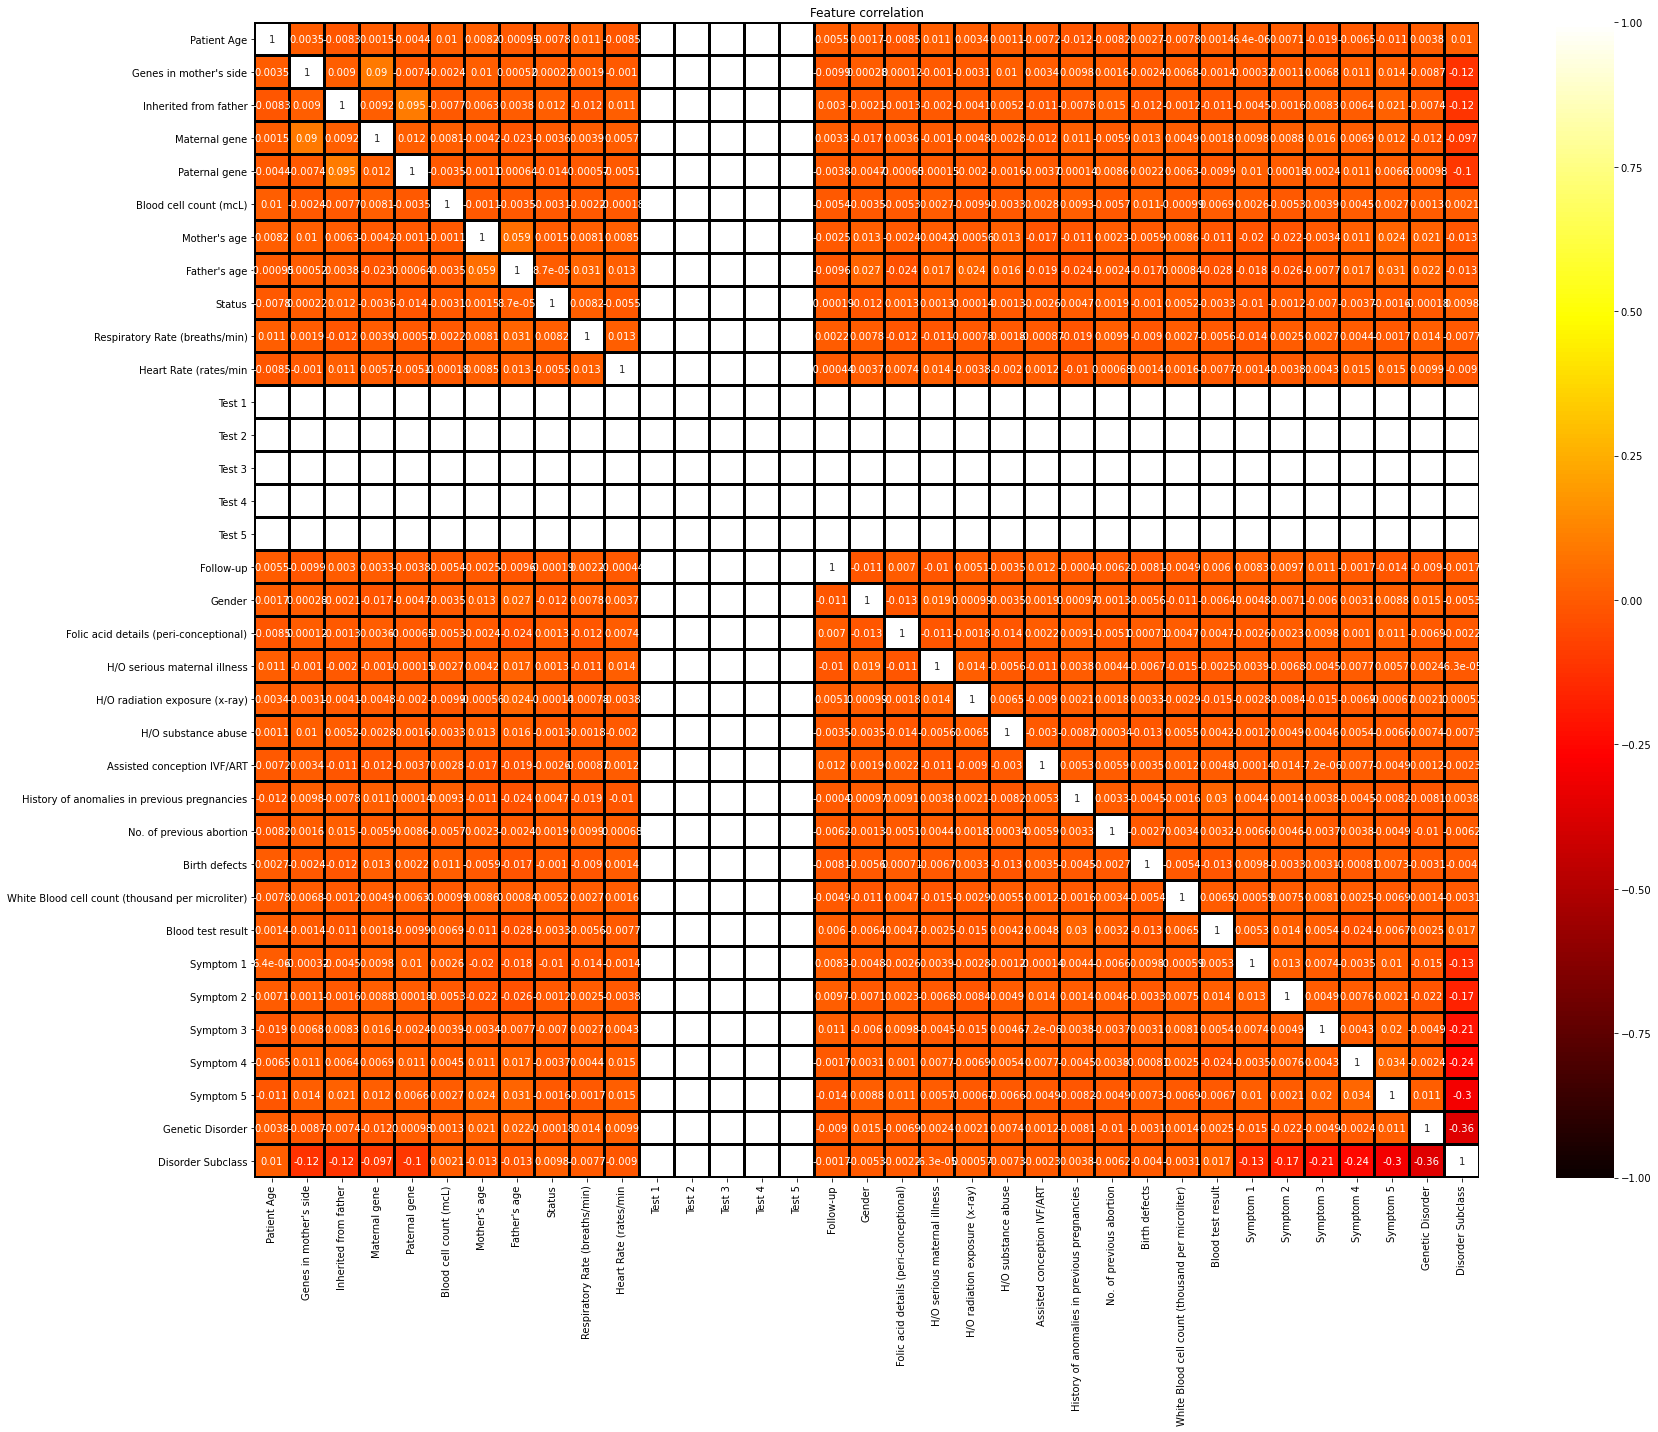

In [14]:
# Calculate correlations
df_encode_corr = df_encode.corr()
#Plot
figure = plt.figure(figsize=(25,20))
sns.heatmap(df_encode_corr,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="hot")
plt.title("Feature correlation")
plt.tight_layout()
plt.savefig('./figures/encodedFeatureHeatmapInit.png')
plt.show()

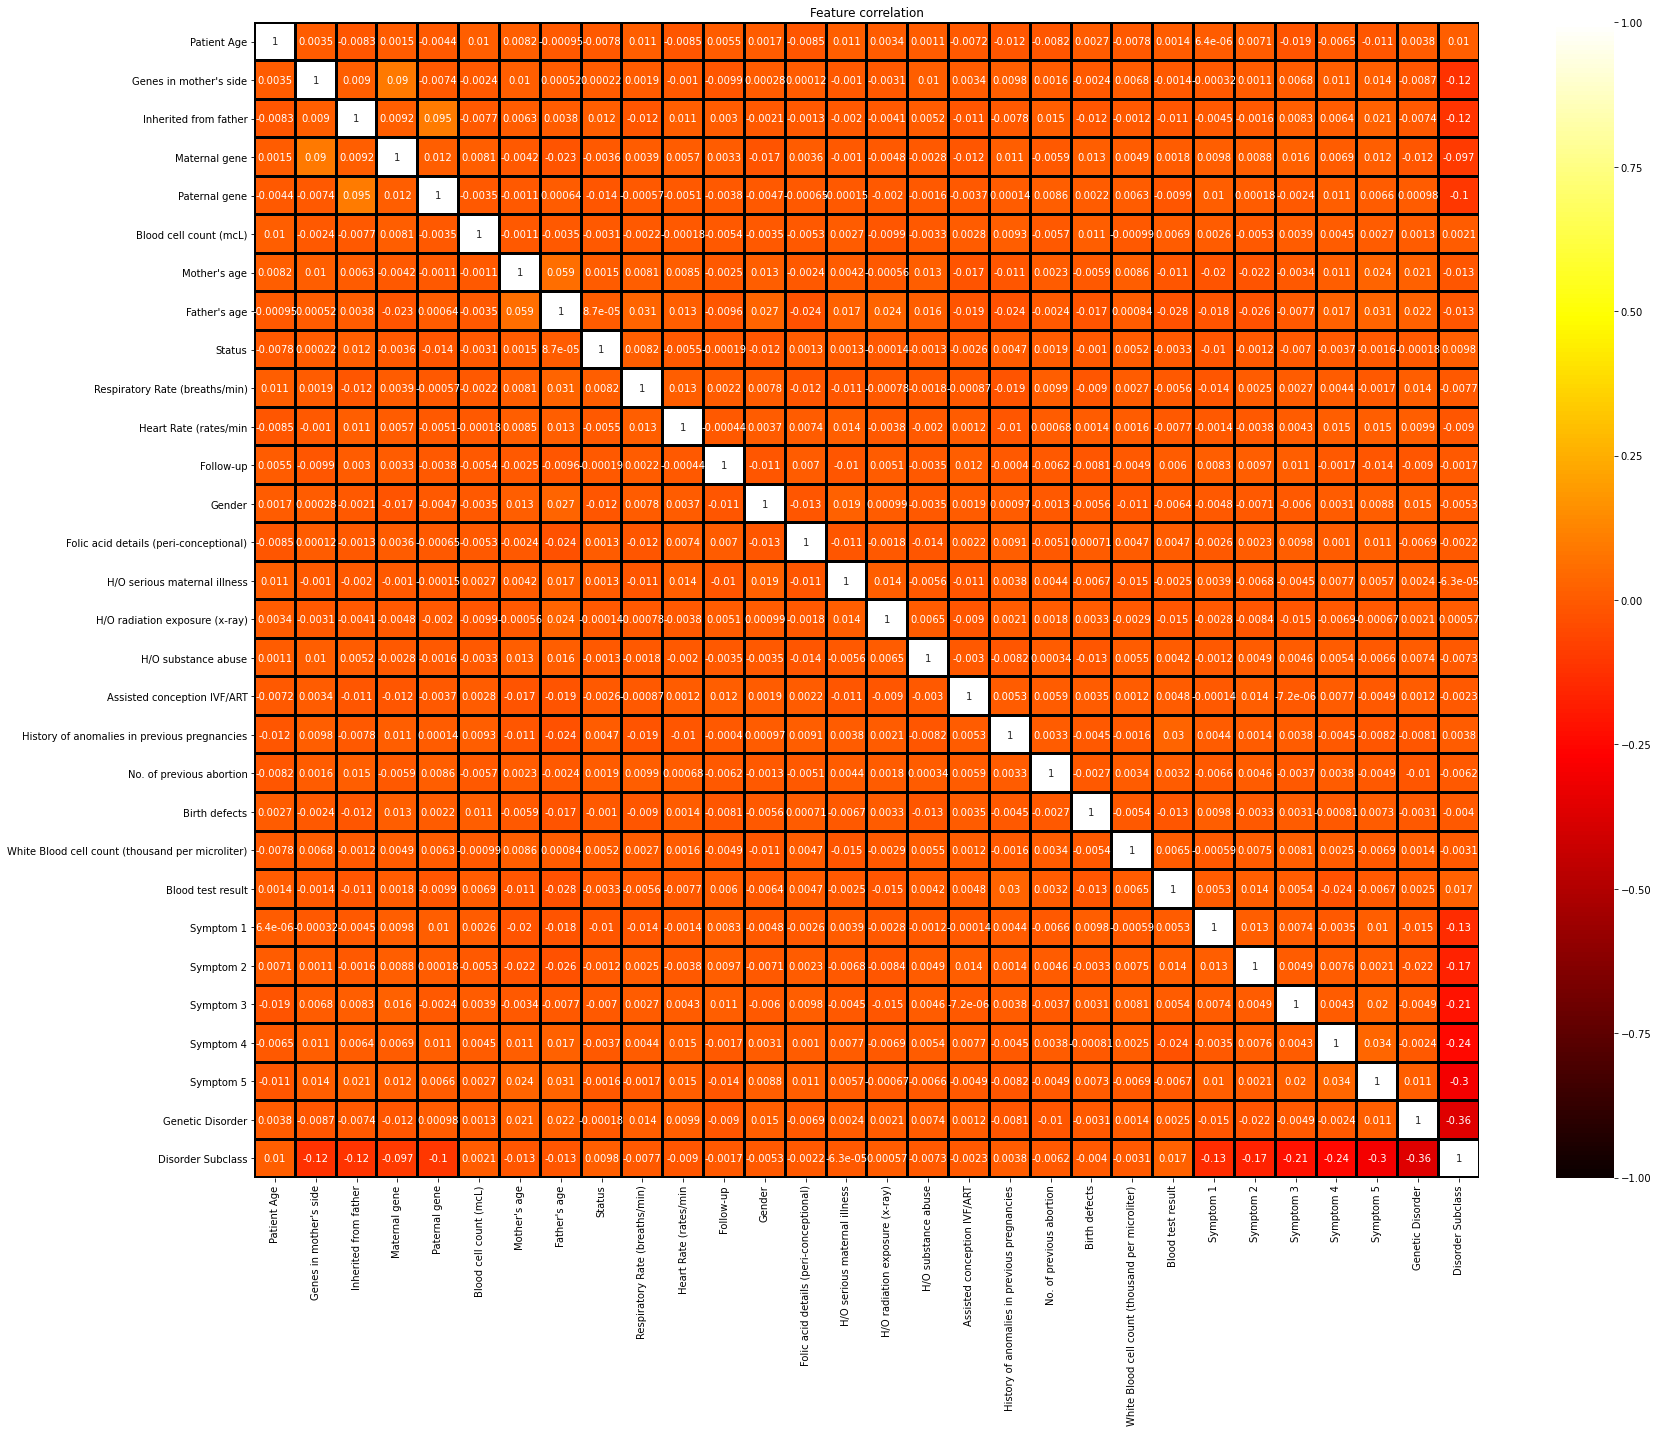

In [15]:
# Calculate correlations
df_encode.drop(['Test 1','Test 2','Test 3','Test 4','Test 5'], axis=1, inplace=True )
df_encode_corr = df_encode.corr()
#Plot
figure = plt.figure(figsize=(25,20))
sns.heatmap(df_encode_corr,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="hot")
plt.title("Feature correlation")
plt.tight_layout()
plt.savefig('./figures/encodedFeatureHeatmap.png')
plt.show()

In [16]:
# One-hot encode disorders to look for correlations between disorder and data
# https://www.researchgate.net/post/Can_I_use_Pearsons_correlation_coefficient_to_know_the_relation_between_perception_and_gender_age_income#:~:text=For%20a%20dichotomous%20categorical%20variable,a%20point%2Dbiserial%20correlation%20coefficient.
df_encode['Disorder+Subclass'] = df['Genetic Disorder'] + ' - ' + df['Disorder Subclass']
onehotgd = pd.get_dummies(df['Genetic Disorder'])
onehotds = pd.get_dummies(df['Disorder Subclass'])
onehotgdds = pd.get_dummies(df_encode['Disorder+Subclass'])
df_encode.drop(['Genetic Disorder', 'Disorder Subclass','Disorder+Subclass'], axis=1, inplace=True)

# Seperate
df_encodegd = df_encode.join(onehotgd)
df_encodeds = df_encode.join(onehotds)
df_encodegdds = df_encode.join(onehotgdds)
df_encode.columns

# Together
df_encode = df_encode.join(onehotgd)
df_encode = df_encode.join(onehotds)
df_encode = df_encode.join(onehotgdds)

In [17]:
# Calculate correlations
df_encode_corr_gd = df_encodegd.corr()
df_encode_corr_ds = df_encodeds.corr()
df_encode_corr_gdds = df_encodegdds.corr()

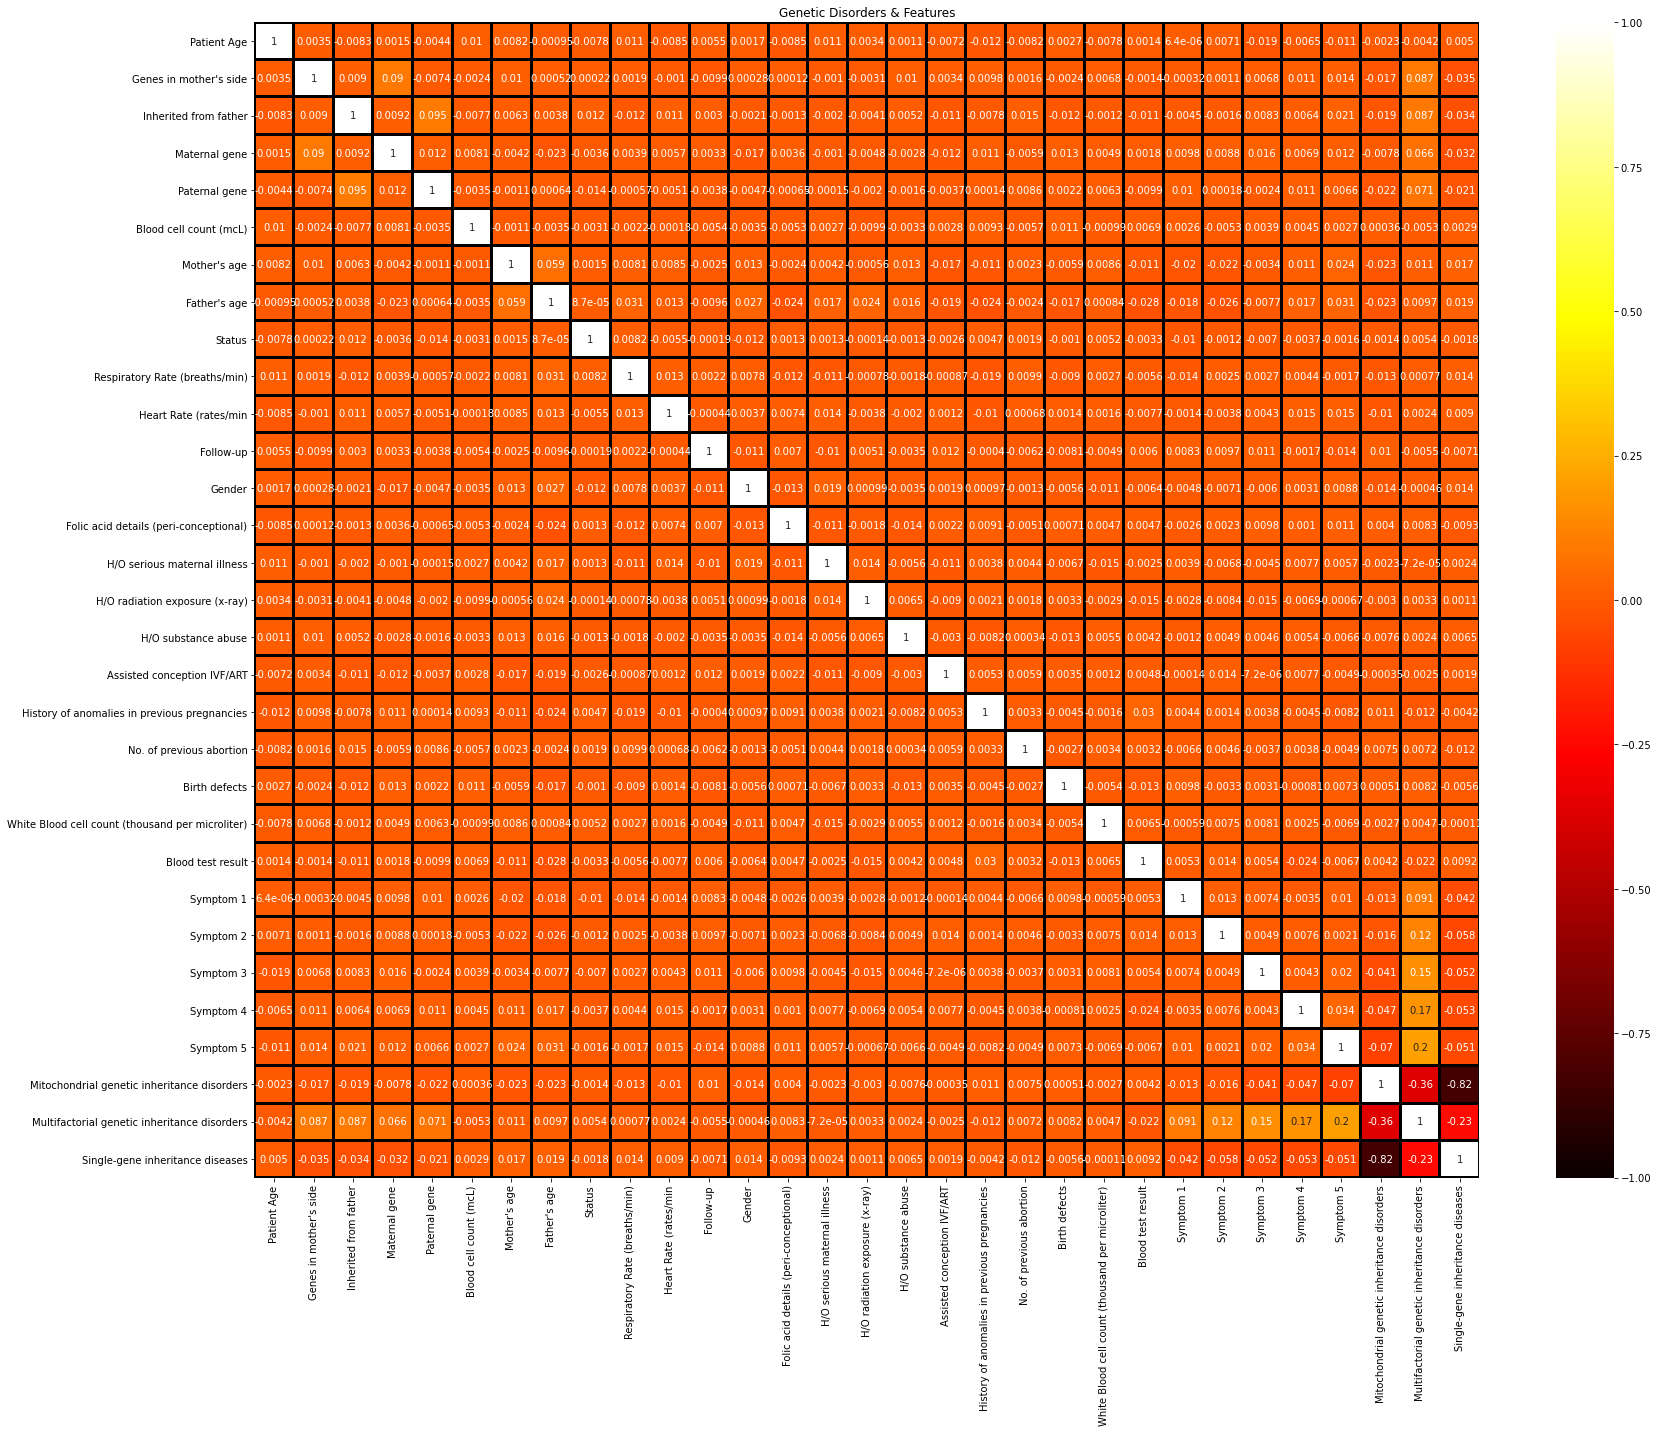

In [18]:
# Plot correlation heatmap with one-hot encoded disorders
figure = plt.figure(figsize=(25,20))
sns.heatmap(df_encode_corr_gd,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="hot")
plt.title("Genetic Disorders & Features")
plt.tight_layout()
plt.savefig('./figures/GenDisorders&Features_corr.png')
plt.show()

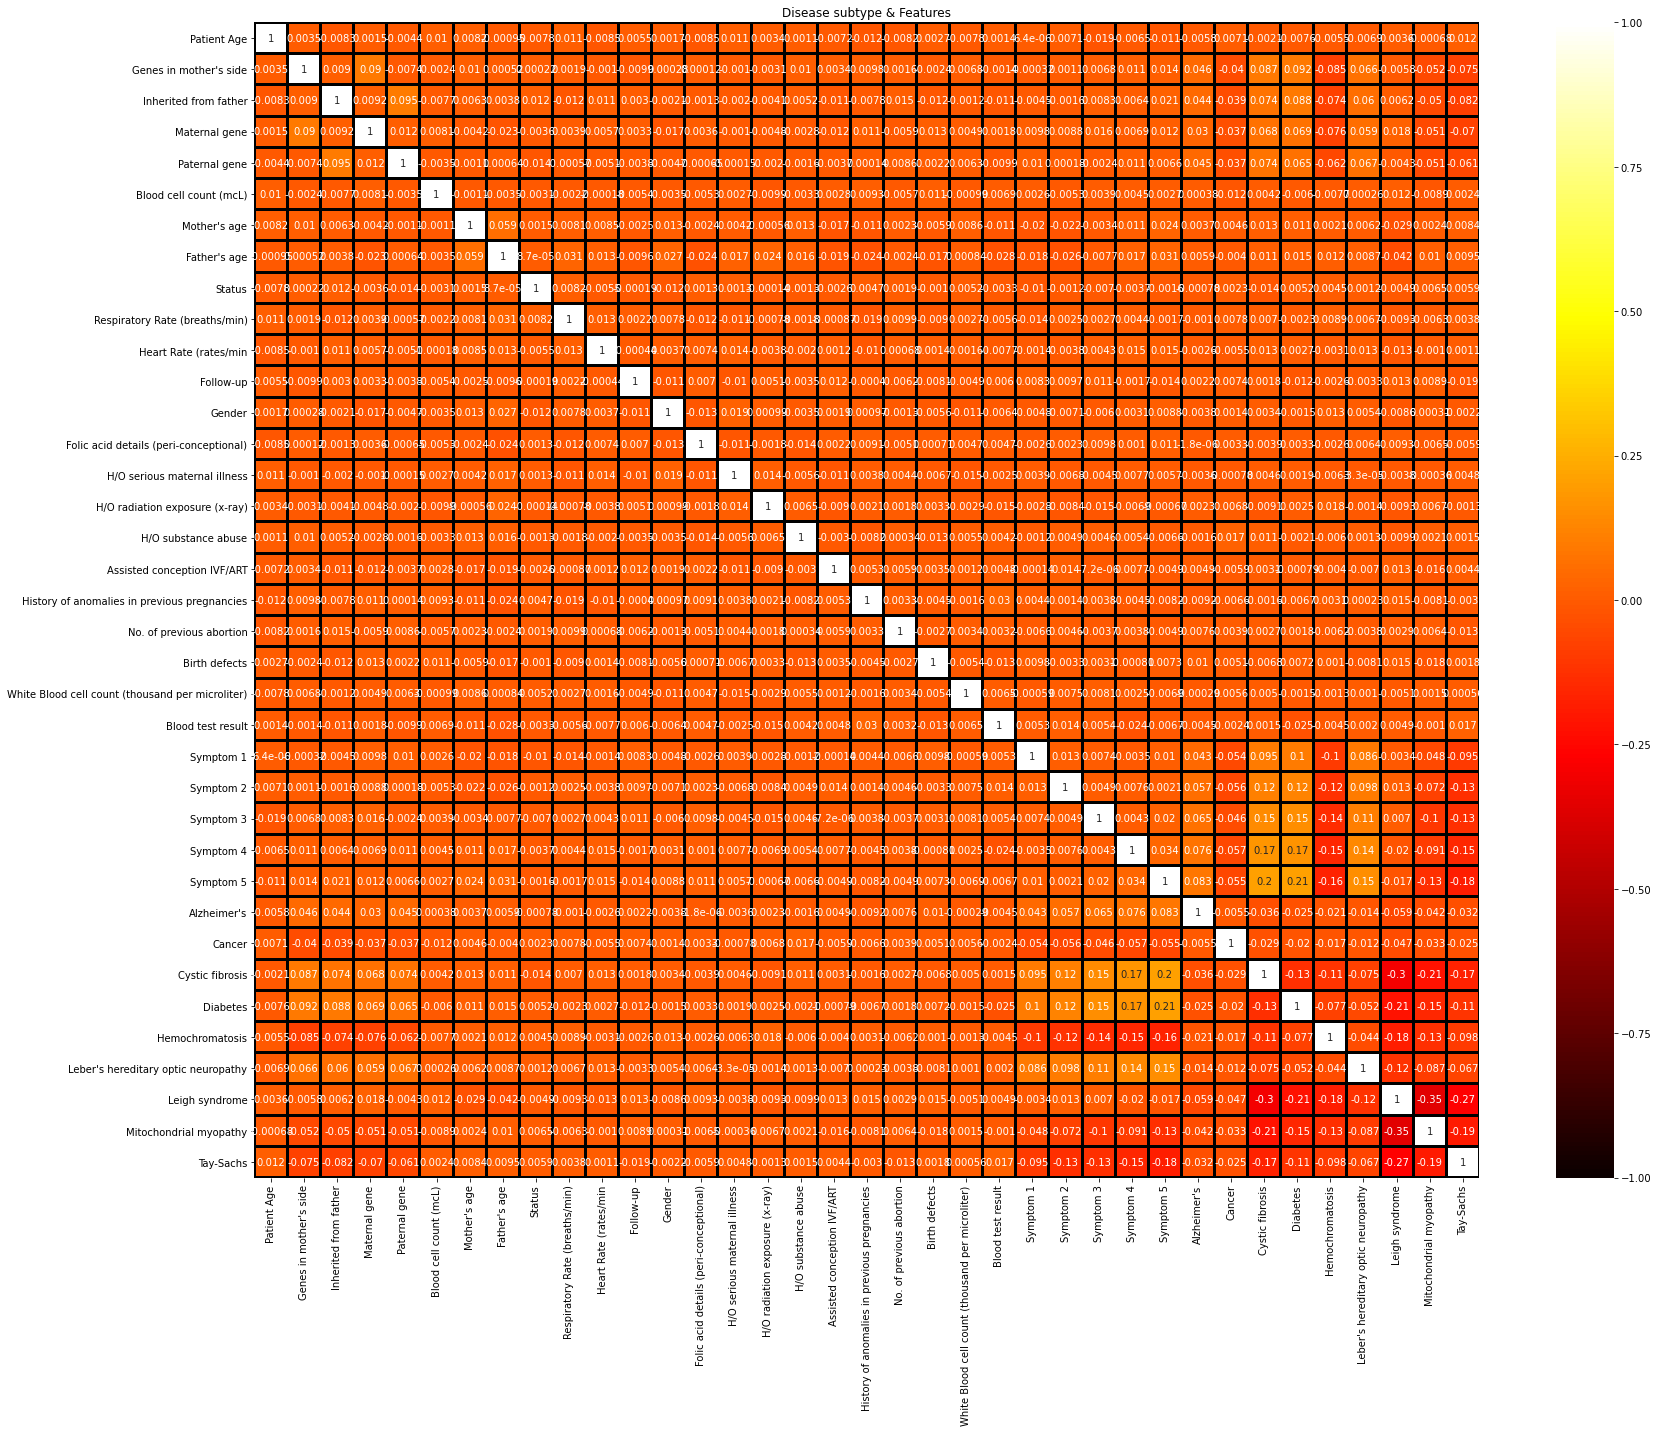

In [19]:
# Plot correlation heatmap with one-hot encoded disorders
figure = plt.figure(figsize=(25,20))
sns.heatmap(df_encode_corr_ds,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="hot")
plt.title("Disease subtype & Features")
plt.tight_layout()
plt.savefig('./figures/DisorderSub&Features_corr.png')
plt.show()

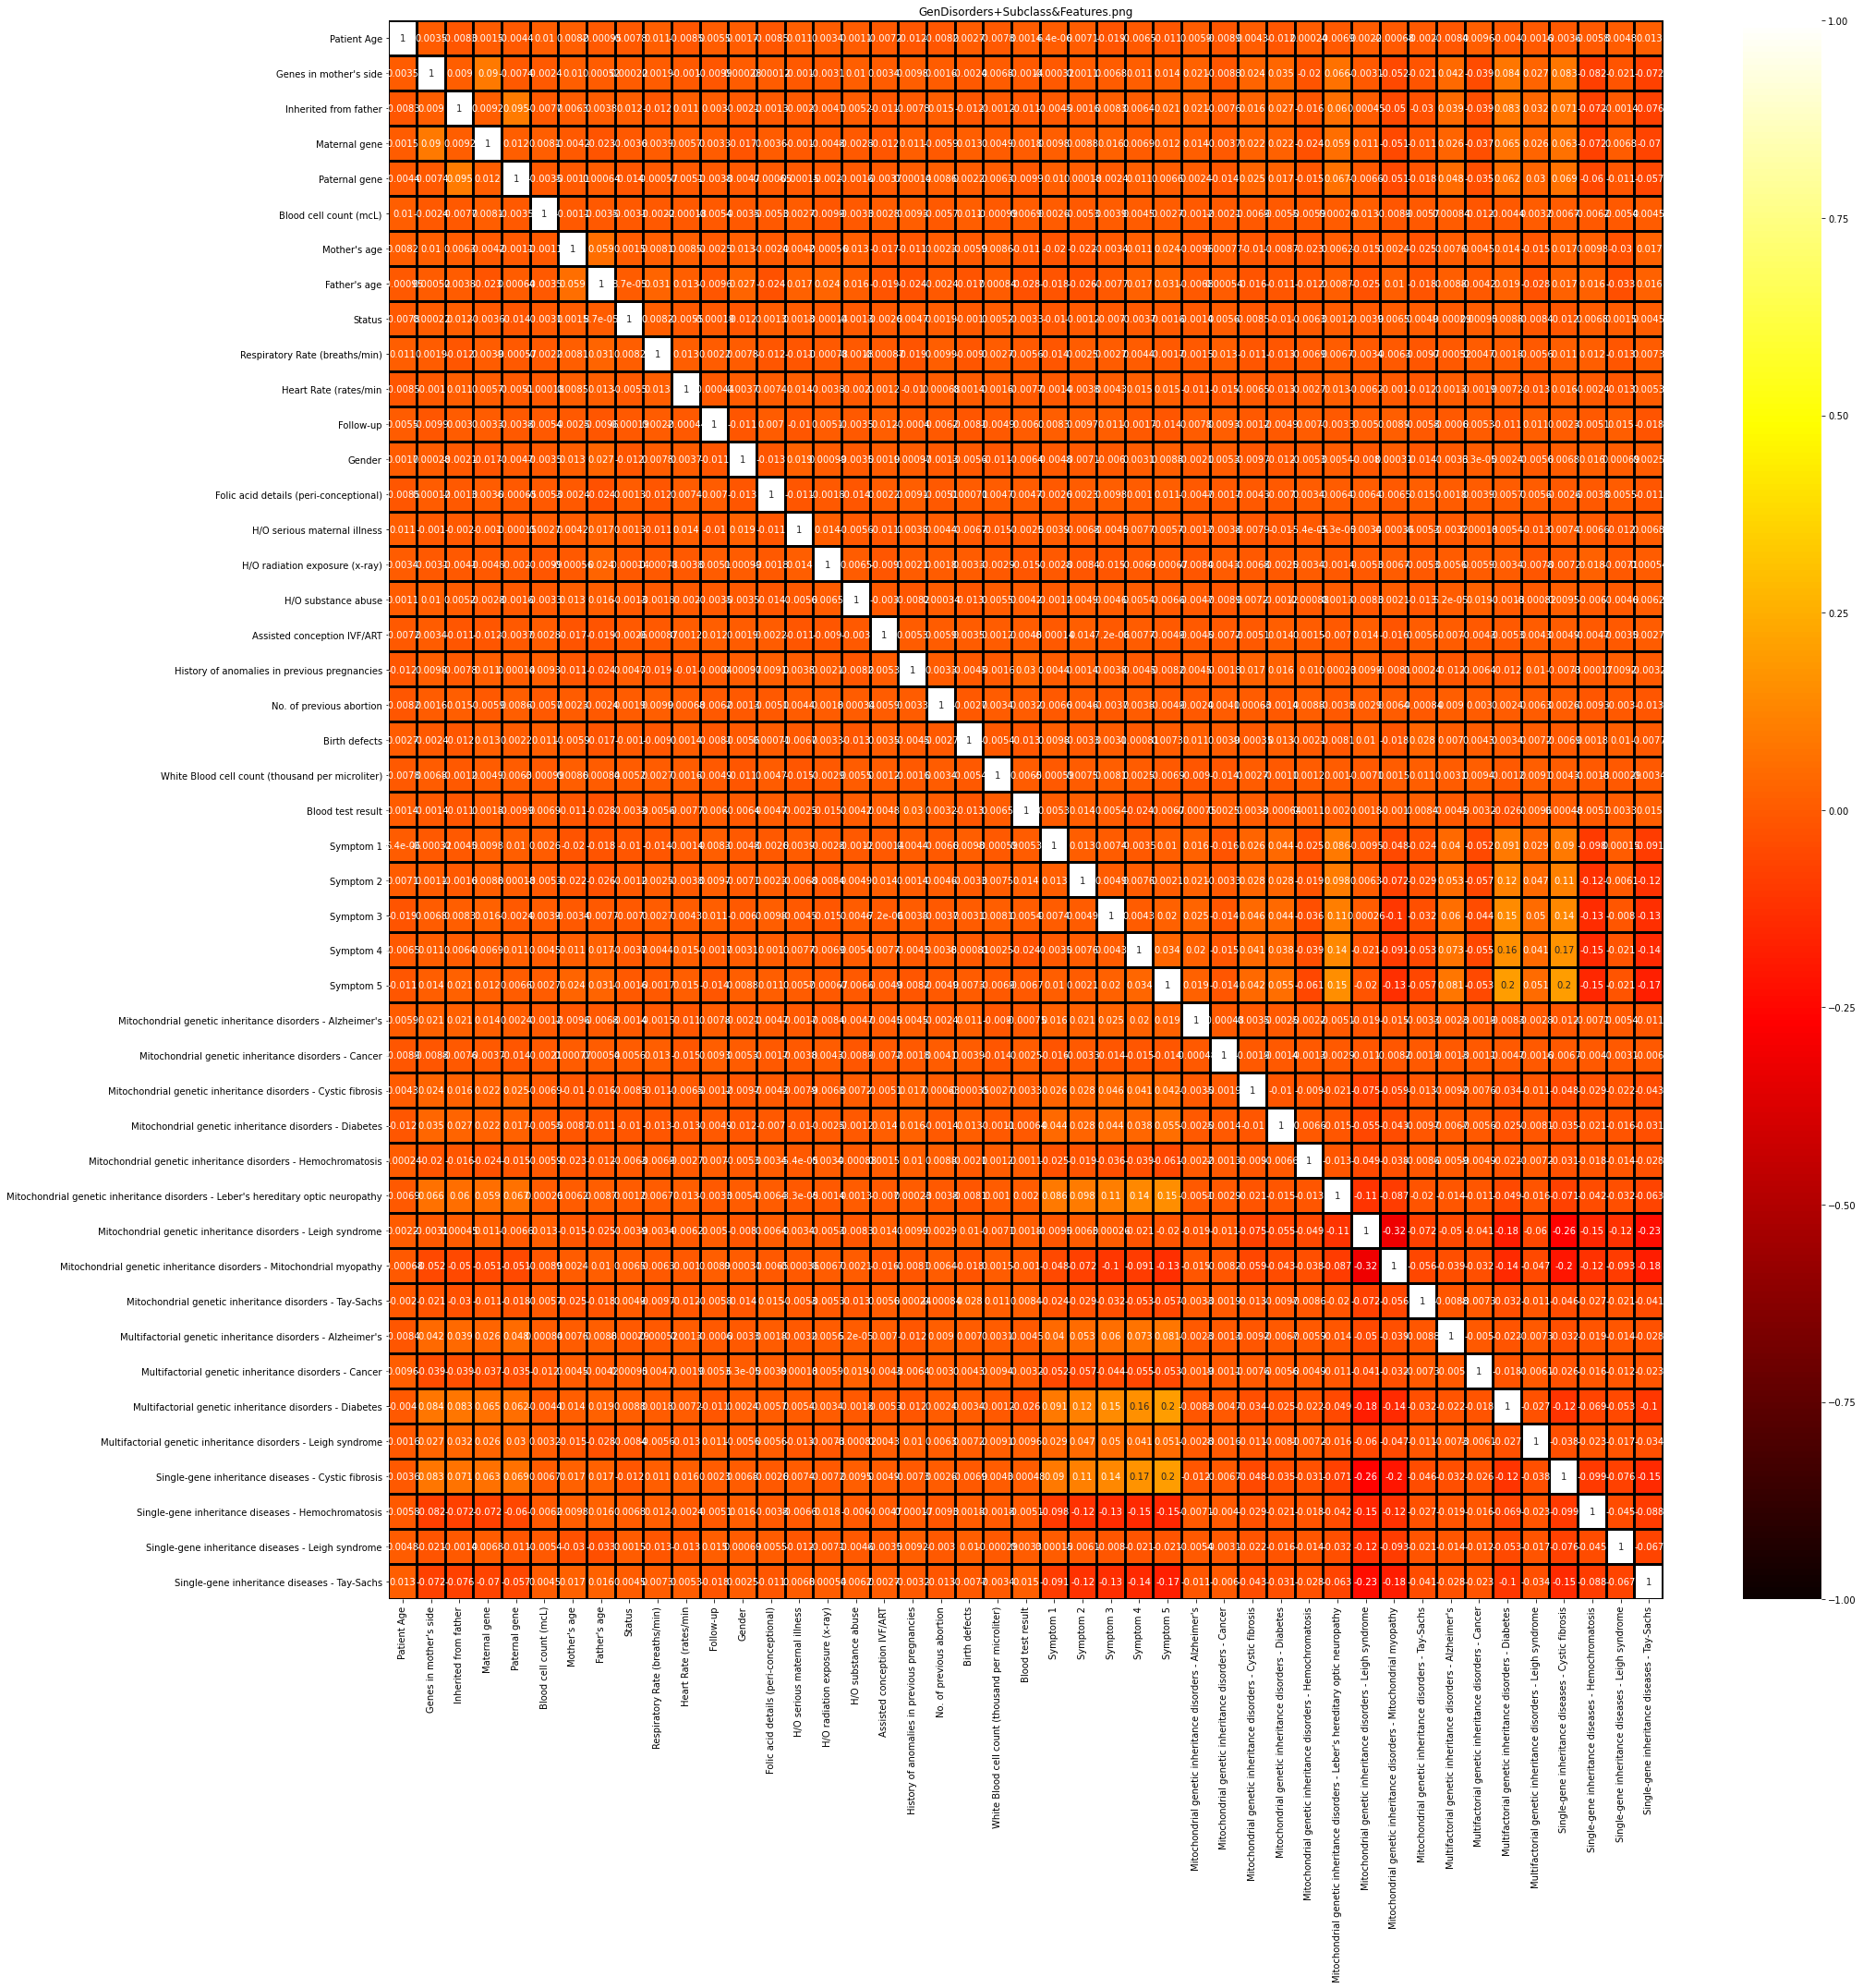

In [20]:
# Plot correlation heatmap with one-hot encoded disorders
figure = plt.figure(figsize=(30,30))
sns.heatmap(df_encode_corr_gdds,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="hot")
plt.title("GenDisorders+Subclass&Features.png")
plt.tight_layout()
plt.show()

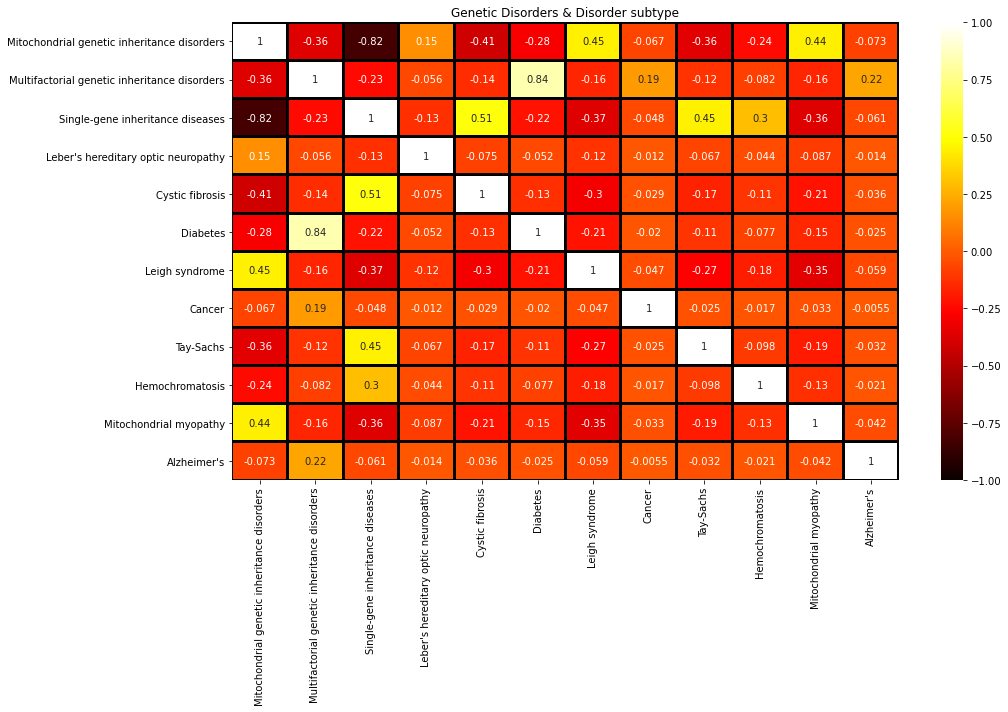

In [21]:
# Plot correlation heatmap with one-hot encoded disorders
df_diseases = df_encode[disordersList[0:12]]
df_diseases_corr = df_diseases.corr()
figure = plt.figure(figsize=(15,10))
sns.heatmap(df_diseases_corr,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="hot")
plt.title("Genetic Disorders & Disorder subtype")
plt.tight_layout()
plt.savefig('./figures/GenDisorders&Subtype.png')
plt.show()

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Follow-up', 'Gender',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Disorder+Subclass', 'Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'],
      dtype='object')


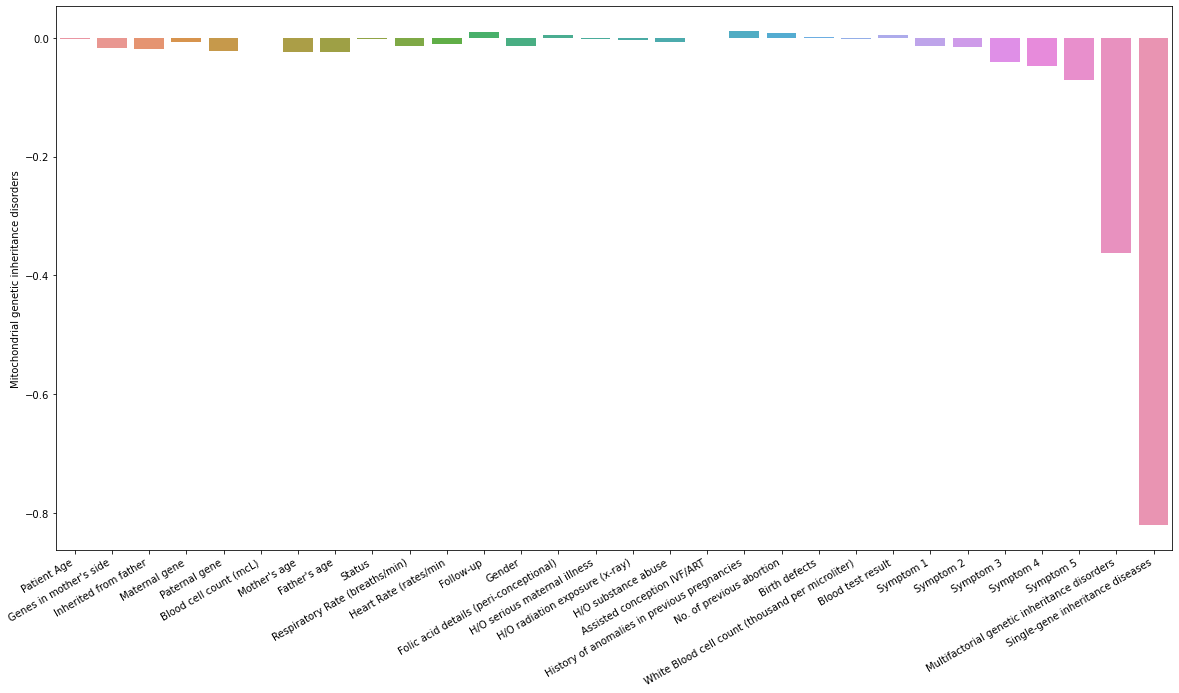

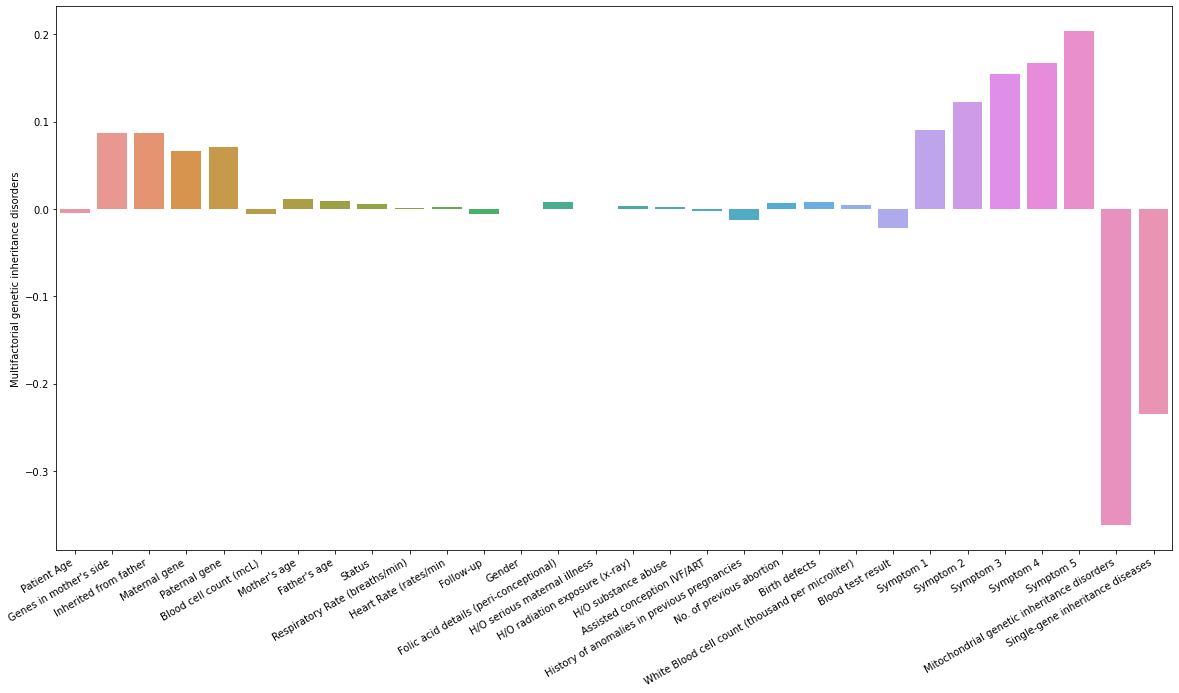

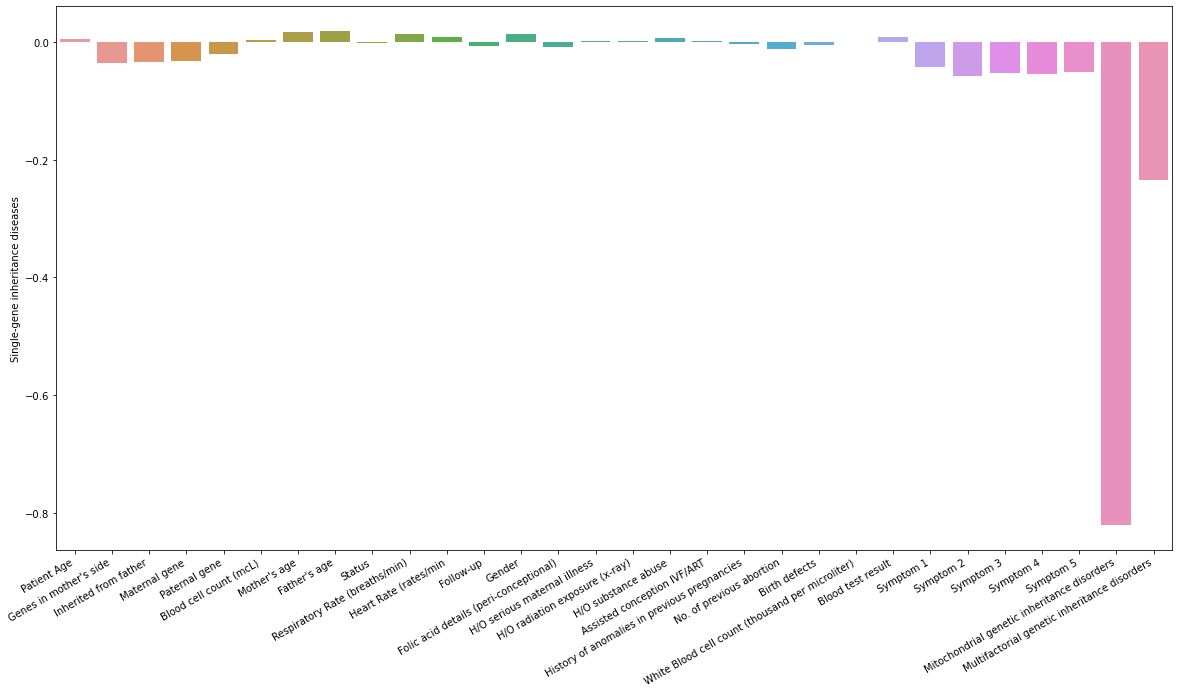

In [32]:
# Check feature correlation with each distinct disorder
df_encode = pd.read_csv('./train_processed_encoded.csv',index_col=0)
df_encode['Disorder+Subclass'] = df['Genetic Disorder'] + ' - ' + df['Disorder Subclass']

onehotgdds = pd.get_dummies(df_encode['Disorder+Subclass'])
onehotgd = pd.get_dummies(df['Genetic Disorder'])

df_encode = df_encode.join(onehotgd)
df_encode.drop(['Genetic Disorder', 'Disorder Subclass'], axis=1, inplace=True)
df_encode_corr = df_encode.corr()
print(df_encode.columns)

disordersList = ['Mitochondrial genetic inheritance disorders',
        'Multifactorial genetic inheritance disorders',
        'Single-gene inheritance diseases']

for dis in disordersList :
    try:
        corrs = df_encode_corr[[dis]].dropna().drop(dis)
        figure = plt.figure(figsize=(20,10))
        g = sns.barplot(corrs.index, corrs[dis])
        g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')
        plt.savefig('./figures/'+dis+'_corr2.png')
    except:
        continue